## **EXERCÍCIO 01 - Basic RNNs**

## **CESAR SCHOOL**
* Pós-graduação em Engenharia e Análise de Dados - 2023.2
* **Disciplina: Tópicos Complementares**
* Professor: **Silvan Ferreira**
* Aluno: **Allan Bispo** - apsb@cesar.school

### **Redes Neurais Recorrentes (RNNs)**

As Redes Neurais Recorrentes (RNNs) são um tipo de rede neural projetada para processar sequências de dados, como séries temporais ou textos. A principal característica das RNNs é a capacidade de manter um estado interno que captura informações sobre as entradas anteriores, permitindo que a rede tenha "memória" dos passos anteriores na sequência.

A cada passo de tempo $t$, a RNN atualiza seu estado oculto $h_t$ com base na entrada atual $x_t$ e no estado oculto anterior $h_{t-1}$:

$$
h_t = \tanh(W_{ih} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h)
$$

Aqui:
- $W_{ih}$ é a matriz de pesos que conecta a entrada ao estado oculto.
- $W_{hh}$ é a matriz de pesos que conecta o estado oculto anterior ao atual.
- $b_h$ é o termo de bias.
- $\tanh$ é a função de ativação que introduz não-linearidade.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

### **Implementação de uma Célula RNN**

Nesta seção, implementaremos uma célula RNN personalizada usando o PyTorch. A célula RNN é a unidade básica de uma RNN, responsável por calcular o novo estado oculto com base na entrada atual e no estado oculto anterior.

#### **Explicação do Código**

O código a seguir define uma célula RNN personalizada:

- **Entrada:** O tamanho da entrada `input_size` e o tamanho do estado oculto `hidden_size`.
- **Pesos:** $ W_{ih} $ e $ W_{hh} $ são as matrizes de pesos, e $ b_h $ é o bias.
- **Saída:** A célula computa o novo estado oculto $ h_t $ a partir da entrada e do estado oculto anterior.

In [2]:
class RNNCell(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.W_ih = nn.Linear(input_size, hidden_size, bias=False) # Define a matriz de pesos de entrada
        self.W_hh = nn.Linear(hidden_size, hidden_size, bias=False) # Define a matriz de pesos de saída
        self.b_h = nn.Parameter(torch.zeros(hidden_size)) # Define o bias

    def forward(self, x, h):
        # x: (batch_size, input_size)
        # h: (batch_size, hidden_size)
        ht = torch.tanh(self.W_ih(x) + self.W_hh(h) + self.b_h)
        return ht

### **Exemplo de Uso da Célula RNN**

Inicialmente, definimos uma célula RNN com um tamanho de entrada de 10 e um tamanho de estado oculto de 4.

In [3]:
# Exemplo
input_size = 10
hidden_size = 4

rnn_cell = RNNCell(input_size, hidden_size)

### **Inspeção dos Parâmetros da Célula RNN**

Neste trecho de código, vamos inspecionar os parâmetros da célula RNN que acabamos de definir. Em uma rede neural, os parâmetros são os valores ajustáveis (como os pesos e bias) que a rede aprende durante o treinamento.

Ao executar o código, veremos os nomes e as formas dos parâmetros:

- **`W_ih`**: Matriz de pesos conectando a entrada ao estado oculto.
- **`W_hh`**: Matriz de pesos conectando o estado oculto anterior ao atual.
- **`b_h`**: Termo de bias para o estado oculto.

In [4]:
for name, param in rnn_cell.named_parameters():
    print(name, param.shape)

b_h torch.Size([4])
W_ih.weight torch.Size([4, 10])
W_hh.weight torch.Size([4, 4])


#### **Explicação do Código**

No exemplo abaixo:
- Inicializamos uma entrada $x$ aleatória e um estado oculto inicial $h$ como zero.
- A célula RNN processa a entrada e gera um novo estado oculto.

In [5]:
x = torch.randn(input_size)
h = torch.zeros(hidden_size)

hn = rnn_cell(x, h)

hn.shape

torch.Size([4])

### **Processamento de Sequências com RNN**

RNNs são projetadas para processar sequências de dados, onde cada passo de tempo depende dos passos anteriores. Vamos demonstrar isso processando uma sequência de entradas com a célula RNN.

#### **Explicação do Código**

Neste exemplo:
- Processamos uma sequência de 3 entradas $x$ e atualizamos o estado oculto $h$ a cada passo.
- O estado oculto é propagado ao longo da sequência, capturando informações temporais.

In [6]:
# Sequences
seq_len = 3

x = torch.randn(seq_len, input_size)
h = torch.zeros(hidden_size)

# Para cada instante de tempo
for i in range(seq_len):
    # Atualiza o estado oculto
    h = rnn_cell(x[i], h)
    print(f"Passo {i+1}")
    print(f"h = {h}")
    print()

Passo 1
h = tensor([-0.7587,  0.5335, -0.2766,  0.1516], grad_fn=<TanhBackward0>)

Passo 2
h = tensor([-0.7776, -0.3646, -0.6605, -0.5698], grad_fn=<TanhBackward0>)

Passo 3
h = tensor([-0.5583,  0.7117, -0.1419,  0.2267], grad_fn=<TanhBackward0>)



### **Processamento de Sequências em Lote (Batched RNN)**

Para aumentar a eficiência, as RNNs podem processar várias sequências simultaneamente, usando o conceito de "batching". Cada sequência no lote é processada de forma independente, mas compartilhando os mesmos pesos da RNN.

#### **Explicação do Código**

Neste exemplo:
- Criamos um batch de 8 sequências, cada uma com 10 entradas.
- A célula RNN é aplicada ao batch, atualizando o estado oculto para cada sequência de forma paralela.

In [7]:
# Batched RNN
batch_size = 8

x = torch.randn(batch_size, input_size)
h = torch.zeros(batch_size, hidden_size)

hn = rnn_cell(x, h)

hn.shape

torch.Size([8, 4])

### **Processamento de Sequências em Lote com Múltiplos Passos de Tempo**

Aqui, processamos um batch de sequências ao longo de vários passos de tempo.

#### **Explicação do Código**

Neste exemplo:
- Processamos um lote de 8 sequências, cada uma com 3 passos de tempo.
- Em cada passo de tempo, a célula RNN atualiza o estado oculto para todas as sequências do lote.

In [8]:
# Sequences
seq_len = 3

x = torch.randn(batch_size, seq_len, input_size)
h = torch.zeros(batch_size, hidden_size)

# Para cada instante de tempo
for i in range(seq_len):
    # Atualiza o estado oculto
    h = rnn_cell(x[:, i], h)
    print(f"Passo {i}")
    print(f"h = {h.shape}")
    print(f"h = {h}")
    print()

Passo 0
h = torch.Size([8, 4])
h = tensor([[-0.7662, -0.3758, -0.0309, -0.5415],
        [ 0.7814, -0.2139,  0.7714, -0.3666],
        [ 0.0584,  0.0221, -0.3618,  0.0496],
        [-0.5763, -0.7218, -0.8162, -0.4245],
        [-0.5196,  0.8778,  0.3699, -0.8153],
        [ 0.3907, -0.0017, -0.3577,  0.4298],
        [-0.0293, -0.3441,  0.2085, -0.1790],
        [-0.2659, -0.3029,  0.4127, -0.3640]], grad_fn=<TanhBackward0>)

Passo 1
h = torch.Size([8, 4])
h = tensor([[-0.0400,  0.3551,  0.3289,  0.5085],
        [ 0.0736,  0.5423,  0.2914, -0.2373],
        [ 0.6227, -0.2293,  0.5134,  0.6356],
        [-0.5460,  0.3256, -0.4145, -0.7954],
        [ 0.2422, -0.7088,  0.1160, -0.6985],
        [-0.2800, -0.4577,  0.2183,  0.1220],
        [-0.6145, -0.1369, -0.3863, -0.2329],
        [ 0.2032,  0.7561,  0.1085, -0.4803]], grad_fn=<TanhBackward0>)

Passo 2
h = torch.Size([8, 4])
h = tensor([[-2.0162e-01,  2.9006e-01, -5.8523e-01,  4.2978e-02],
        [ 2.8020e-01,  2.7324e-01, -3.1032e

### **Construção de uma Rede RNN Completa**

Vamos expandir a célula RNN que criamos anteriormente para uma rede RNN completa. A rede RNN será composta por uma célula RNN seguida por uma camada linear que produzirá a saída final.

#### **Explicação do Código**

- **`self.cell`**: Instância da célula RNN que processará cada passo da sequência.
- **`self.W_ho`**: Camada linear que mapeia o estado oculto final para a saída desejada.

No método `forward`:
- **Entrada (`x`)**: Um tensor de forma `(batch_size, seq_len, input_size)`, onde `seq_len` é o comprimento da sequência.
- **Estado oculto (`h`)**: Se não for fornecido, é inicializado como um vetor de zeros.
- **Processamento da sequência**: A entrada é processada passo a passo pela célula RNN.
- **Saída (`y`)**: Calculada pela camada linear a partir do estado oculto final.

In [9]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.cell = RNNCell(input_size, hidden_size) # Define a célula RNN
        self.W_ho = nn.Linear(hidden_size, output_size) # Define a matriz de pesos de saída

    def forward(self, x, h=None):
        # x: (batch_size, seq_len, input_size)
        batch_size, seq_len, _ = x.size()

        # h: (batch_size, hidden_size)
        if h is None:
            h = torch.zeros(batch_size, self.hidden_size)
        h = h.to(x.device)

        # Processa a sequência
        for i in range(seq_len):
            h = self.cell(x[:, i], h)

        # Calcula a saída
        y = self.W_ho(h)
        return y

### **Geração de Dados para Treinamento**

Para treinar a RNN, precisamos de um conjunto de dados sequenciais. Neste exemplo, geramos uma série temporal baseada em uma função senoide com ruído adicionado.

#### **Explicação do Código**

- **`x`**: Sequência de pontos no intervalo $[0, 6\pi]$.
- **`y`**: Valores da função senoide com ruído gaussiano adicionado.

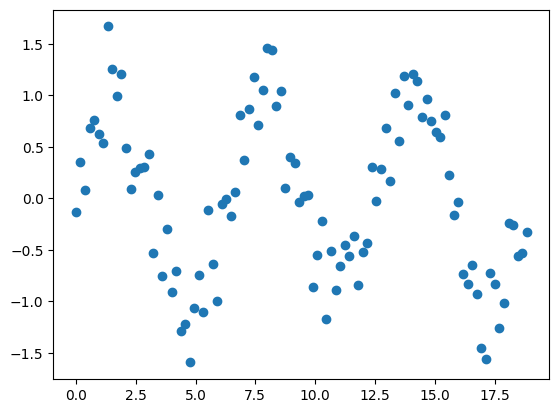

In [10]:
num_points = 100

x = np.linspace(0, 6*np.pi, num_points)
y = np.sin(x) + np.random.normal(0, 0.3, num_points)

plt.scatter(x, y)
plt.show()

### **Preparação das Sequências de Treinamento**

Agora, preparamos as entradas e as saídas alvo para o treinamento da RNN. Cada sequência de entrada será usada para prever o próximo ponto na série temporal.

#### **Explicação do Código**

- **`sequence_length`**: O comprimento da janela da sequência usada como entrada.
- **`inputs`**: Sequências de tamanho `sequence_length` extraídas dos dados.
- **`targets`**: O ponto subsequente na sequência que a rede deve prever.
- **Tensorização**: As sequências são convertidas em tensores PyTorch para uso na rede neural.

In [11]:
sequence_length = 20
batch_size = num_points - sequence_length
inputs = []
targets = []

for i in range(num_points - sequence_length):
    inputs.append(y[i:i+sequence_length])
    targets.append(y[i+sequence_length])

inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)
targets = torch.tensor(targets, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, 1)

<ipython-input-11-a31d50ca37e9>:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  inputs = torch.tensor(inputs, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)


### **Inicialização da Rede RNN e do Otimizador**

Nesta seção, instanciamos a rede RNN com os tamanhos de entrada, estado oculto, e saída definidos. Também configuramos o critério de perda e o otimizador.

#### **Explicação do Código**

- **`input_size`**: Dimensão da entrada (1, já que estamos lidando com uma série temporal univariada).
- **`hidden_size`**: Número de unidades no estado oculto.
- **`output_size`**: Dimensão da saída (1, pois queremos prever um único valor por vez).

In [12]:
input_size = 1
hidden_size = 8
output_size = 1

rnn = RNN(input_size, hidden_size, output_size)

In [13]:
criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.01)

In [14]:
# Treinamento
num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = rnn(inputs)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 1.1030094623565674
Epoch 50, Loss: 0.12565000355243683
Epoch 100, Loss: 0.09627428650856018
Epoch 150, Loss: 0.081470787525177
Epoch 200, Loss: 0.06796084344387054
Epoch 250, Loss: 0.0545790009200573
Epoch 300, Loss: 0.04199334233999252
Epoch 350, Loss: 0.034799810498952866
Epoch 400, Loss: 0.02869269624352455
Epoch 450, Loss: 0.023452172055840492


### **Geração de Predições com a Rede Treinada**

Após o treinamento, usamos a RNN para gerar previsões de uma nova série temporal. A ideia é prever a continuação da senoide a partir de uma sequência inicial.

#### **Explicação do Código**

- **`predicted_wave`**: Lista para armazenar as predições feitas pela RNN.
- **`input_seq`**: Sequência inicial usada para começar a predição.
- **Passos de predição**:
  - A cada passo, a rede faz uma nova predição que é adicionada à sequência de entrada.
  - A janela de entrada é atualizada para incluir a nova predição e excluir o ponto mais antigo.

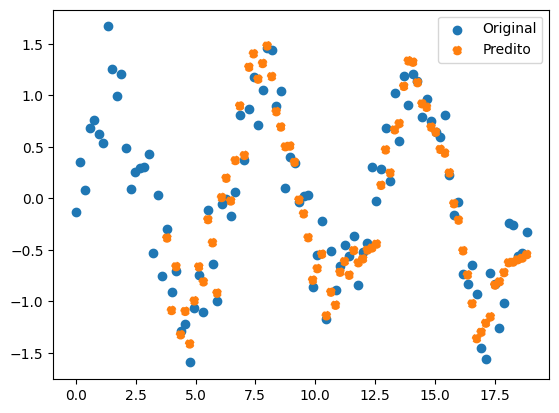

In [15]:
# Gerando predições para uma senoide
predicted_wave = []

input_seq = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq = torch.tensor(input_seq, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next = rnn(input_seq)
    predicted_wave.append(predicted_next.item())

    # Arrasta a janela de entrada
    predicted_next = predicted_next.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq = torch.cat([input_seq[:, 1:, :], predicted_next], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
plt.scatter(x[sequence_length:], predicted_wave, label='Predito', linestyle='dashed')
plt.legend()
plt.show()

## **Exercícios**

### **Exercício 1: Aumentando o Tamanho do Estado Oculto**

1. Aumente o tamanho do estado oculto (`hidden_size`) na rede RNN.
2. Treine a rede novamente com os mesmos dados de entrada.
3. Compare a perda final e as predições da rede com o modelo original.
4. Pergunta: Como o aumento do tamanho do estado oculto afetou o desempenho da rede?

In [22]:
# Aumentando o hidden_size

input_size = 1
hidden_size_novo = 16
output_size = 1

rnn_hsn = RNN(input_size, hidden_size_novo, output_size)

In [23]:
# Aplicando o critério e otimizador com o hidden_size novo

criterion = nn.MSELoss()
optimizer_hsn = optim.Adam(rnn_hsn.parameters(), lr=0.01)

In [24]:
# Treinamento com o hidden_size novo

num_epochs = 500
for epoch in range(num_epochs):
    optimizer_hsn.zero_grad()

    predictions = rnn_hsn(inputs)
    loss = criterion(predictions, targets)
    loss.backward()
    optimizer_hsn.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.6651433110237122
Epoch 50, Loss: 0.11145128309726715
Epoch 100, Loss: 0.08458533883094788
Epoch 150, Loss: 0.0630681961774826
Epoch 200, Loss: 0.04384882003068924
Epoch 250, Loss: 0.041323330253362656
Epoch 300, Loss: 0.014099957421422005
Epoch 350, Loss: 0.005718315951526165
Epoch 400, Loss: 0.006339948624372482
Epoch 450, Loss: 0.002802640665322542


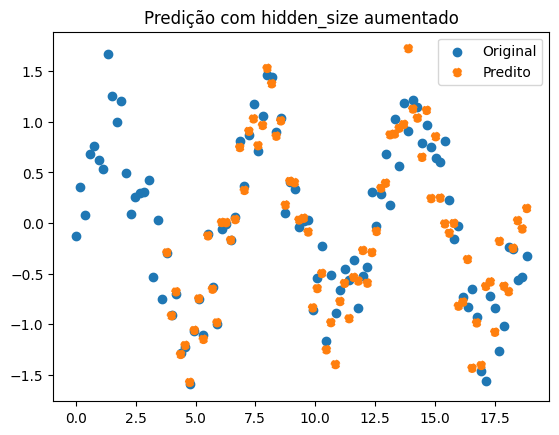

In [26]:
# Gerando predições para uma senoide com o hidden_size novo

predicted_wave_hsn = []

input_seq = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq = torch.tensor(input_seq, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next_hsn = rnn_hsn(input_seq)
    predicted_wave_hsn.append(predicted_next_hsn.item())

    # Arrasta a janela de entrada
    predicted_next_hsn = predicted_next_hsn.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq = torch.cat([input_seq[:, 1:, :], predicted_next_hsn], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
plt.scatter(x[sequence_length:], predicted_wave_hsn, label='Predito', linestyle='dashed')
plt.title('Predição com hidden_size aumentado')
plt.legend()
plt.show()

####**`Resposta Exercício 1`**
* O aumento no número de camadas ocultas possibilitou o modelo RNN ter mais nós de rede para treinar e, com a recorrência com as camadas anteriores, o erro pode ser reduzido.
* Nesse exercício o número de hidden_size foi de 8 para 16 (+100%), implicando numa redução de +90% no loss da última época (de 0.036 para 0.003).
* Entretanto o loss ficou muito baixo, indicando que o modelo está em overfitting em vários pontos.
--------------------------------------------------------------------


### **Exercício 2: Predição de Longo Prazo**

1. Use a RNN treinada para prever 100 pontos futuros da senoide a partir de uma nova sequência inicial de 20 pontos.
2. Aumente o número de camadas ocultas e tente novamente.
2. Compare as predições com a senoide original.
3. Pergunta: A rede consegue manter a forma da senoide por um longo período de predição? O que acontece com as predições ao longo do tempo?

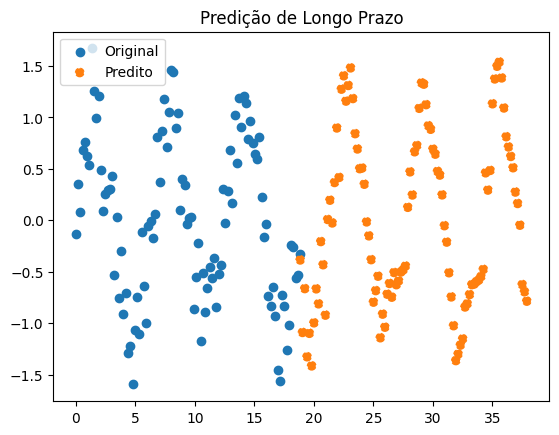

In [27]:
# Gerando predições de longo prazo para uma senoide

num_pontos_futuros = 100

predicted_wave_npf = []

input_seq = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq = torch.tensor(input_seq, dtype=torch.float32)

for _ in range(num_pontos_futuros):
    predicted_next_npf = rnn(input_seq)
    predicted_wave_npf.append(predicted_next_npf.item())

    # Arrasta a janela de entrada
    predicted_next_npf = predicted_next_npf.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq = torch.cat([input_seq[:, 1:, :], predicted_next_npf], dim=1) # Remove o primeiro elemento e adiciona a predição

# Gerar valores de x para as predições, continuando de onde o x original parou
x_pred = np.linspace(x[-1], x[-1] + (x[1] - x[0]) * num_pontos_futuros, num_pontos_futuros)

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
# Use x_pred for plotting predicted values
plt.scatter(x_pred, predicted_wave_npf, label='Predito', linestyle = 'dashed')
plt.title('Predição de Longo Prazo')
plt.legend()
plt.show()

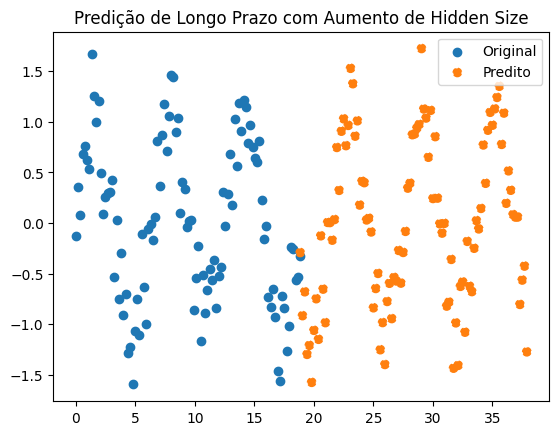

In [28]:
# Gerando predições de longo prazo para uma senoide com aumento do hidden_size

num_pontos_futuros = 100

predicted_wave_npf = []

input_seq = y[:sequence_length].reshape(1, sequence_length, 1)
input_seq = torch.tensor(input_seq, dtype=torch.float32)

for _ in range(num_pontos_futuros):
    predicted_next_npf = rnn_hsn(input_seq)
    predicted_wave_npf.append(predicted_next_npf.item())

    # Arrasta a janela de entrada
    predicted_next_npf = predicted_next_npf.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq = torch.cat([input_seq[:, 1:, :], predicted_next_npf], dim=1) # Remove o primeiro elemento e adiciona a predição

# Gerar valores de x para as predições, continuando de onde o x original parou
x_pred = np.linspace(x[-1], x[-1] + (x[1] - x[0]) * num_pontos_futuros, num_pontos_futuros)

# Plota a senoide original e a predição
plt.scatter(x, y, label='Original')
# Use x_pred for plotting predicted values
plt.scatter(x_pred, predicted_wave_npf, label='Predito', linestyle = 'dashed') # Changed x[sequence_length:] to x_pred
plt.title('Predição de Longo Prazo com Aumento de Hidden Size')
plt.legend()
plt.show()

####**`Resposta Exercício 2`**
* Visualmente analisando a rede não consegue manter a forma da senóide ao longo do período de predição.
* Há inclusive uma extrapolação dos pontos para além dos limites inferiores e superiores dos pontos originais.
* E mesmo aumentando a quantidade de camadas ocultas essas diferenças não são solucionadas.
* Essa distorção ocorre principalmente devido ao acúmulo e propagação de erros dos pontos.
--------------------------------------------------------------------

### **Exercício 3: Adicionando Ruído**

1. Adicione um ruído gaussiano mais forte à série temporal original (aumente a variância do ruído).
2. Treine a RNN com essa série temporal ruidosa.
3. Compare as predições com o modelo treinado com menos ruído.
4. Pergunta: Como o aumento do ruído nos dados de entrada impacta a capacidade da RNN de prever corretamente a série temporal?

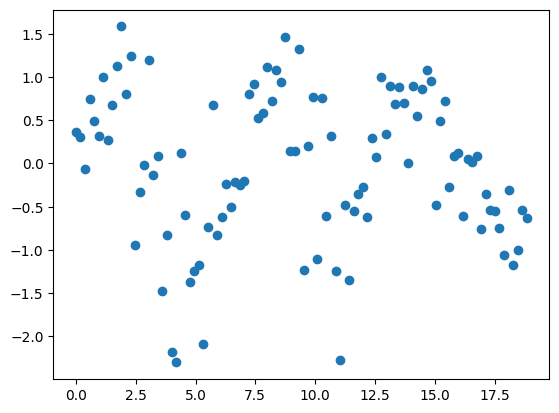

In [29]:
# Adicionando mais rúido aos dados

num_points = 100

x = np.linspace(0, 6*np.pi, num_points)
y_r = np.sin(x) + np.random.normal(0, 0.6, num_points) # 'ruído' foi de 0.3 para 0.6

plt.scatter(x, y_r)
plt.show()

In [30]:
# Preparação da sequência de treinamento com dados mais ruidosos

sequence_length = 20
batch_size = num_points - sequence_length
inputs_r = []
targets_r = []

for i in range(num_points - sequence_length):
    inputs_r.append(y_r[i:i+sequence_length])
    targets_r.append(y_r[i+sequence_length])

inputs_r = torch.tensor(inputs_r, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, window_size, 1)
targets_r = torch.tensor(targets_r, dtype=torch.float32).unsqueeze(-1)  # Shape: (batch_size, 1)

In [31]:
# Inicialização da rede e otimizador para cenário com os dados com mais ruído

input_size = 1
hidden_size = 8
output_size = 1

rnn = RNN(input_size, hidden_size, output_size)

criterion = nn.MSELoss()
optimizer = optim.Adam(rnn.parameters(), lr=0.01)

In [32]:
# Treinamento com os dados mais ruidos

num_epochs = 500
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions_r = rnn(inputs_r)
    loss_r = criterion(predictions_r, targets_r)
    loss_r.backward()
    optimizer.step()

    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss_r: {loss_r.item()}')

Epoch 0, Loss_r: 0.8157757520675659
Epoch 50, Loss_r: 0.36884599924087524
Epoch 100, Loss_r: 0.19821515679359436
Epoch 150, Loss_r: 0.12563487887382507
Epoch 200, Loss_r: 0.11252864450216293
Epoch 250, Loss_r: 0.08479386568069458
Epoch 300, Loss_r: 0.07250010222196579
Epoch 350, Loss_r: 0.06446504592895508
Epoch 400, Loss_r: 0.06516174972057343
Epoch 450, Loss_r: 0.058242518454790115


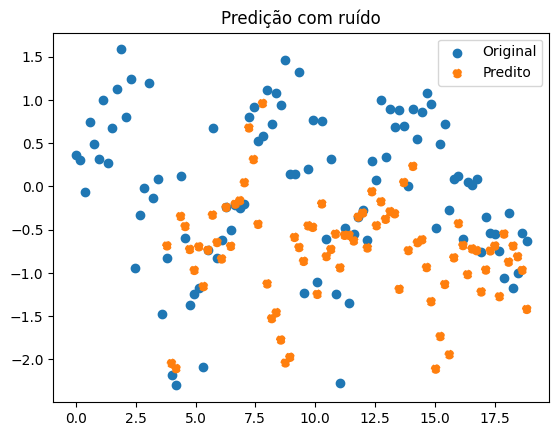

In [33]:
# Gerando predições para uma senoide com dados mais ruidosos

predicted_wave_r = []

input_seq_r = y_r[:sequence_length].reshape(1, sequence_length, 1)
input_seq_r = torch.tensor(input_seq_r, dtype=torch.float32)

for _ in range(num_points - sequence_length):
    predicted_next_r = rnn(input_seq_r)
    predicted_wave_r.append(predicted_next_r.item())

    # Arrasta a janela de entrada
    predicted_next_r = predicted_next_r.view(1, 1, 1)  # Reshape para (1, 1, 1)
    input_seq_r = torch.cat([input_seq_r[:, 1:, :], predicted_next_r], dim=1) # Remove o primeiro elemento e adiciona a predição

# Plota a senoide original e a predição
plt.scatter(x, y_r, label='Original')
plt.scatter(x[sequence_length:], predicted_wave_r, label='Predito', linestyle='dashed')
plt.title('Predição com ruído')
plt.legend()
plt.show()

####**`Resposta Exercício 3`**
* Conforme visto no 'loss' das épocas finais a perda aumentou com o ruído maior.
* Com isso o modelo se mostrou ineficiente em predizer os valores, ou seja, o modelo está simples demais para dados muito ruidosos.